In [1]:
import pandas as pd
import numpy as np

# Setting seed 
np.random.seed(42)

# Generating ID
ids = ['ID' + str(i).zfill(3) for i in range(1, 801)]  

# Generating Group
group_choices = ['A', 'B', 'C']
group = np.random.choice(group_choices, size=800, p=[1/3, 1/3, 1/3])

# Generating Feature 1
feature_1 = np.random.normal(2500, 100, 800)  # Mean: 2500, SD: 100
feature_1 = np.clip(feature_1, 2200, 2800)  # Setting values between 2200 and 2800

# Generating Feature 2
feature_2 = np.random.normal(400, 15, 800)  # Mean: 400, SD: 15

# Generating Feature_3 based on Group
feature_3 = np.zeros(800)
for i in range(800):
    if group[i] == 'A':
        feature_3[i] = 3 * feature_1[i] - 5 * feature_2[i]
    elif group[i] == 'B':
        feature_3[i] = 2 * feature_1[i]
    else:
        feature_3[i] = -feature_1[i] + feature_2[i]

# Adding noise to Feature 3
noise = np.random.normal(0, 12, 800)
feature_3 += noise

# Creating a DataFrame
data = pd.DataFrame({
    'ID': ids,
    'Group': group,
    'Feature_1': feature_1,
    'Feature_2': feature_2,
    'Feature_3': feature_3
})

In [2]:
data.to_csv('fake_data.csv', index=False)  # Saves the DataFrame to 'fake_data.csv' without index column


In [3]:
df = pd.read_csv("fake_data.csv")

In [4]:
df.head()

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID001,B,2420.952554,408.074441,4837.605027
1,ID002,C,2547.146836,416.087610,-2138.829727
2,ID003,C,2688.202450,394.525709,-2284.746437
3,ID004,B,2634.542005,387.411855,5266.909319
4,ID005,A,2659.318663,384.327862,6048.524201


### A. Since 66% of the the data for feature 1 falls between 2200 and 2800, then 34% of the data falls outside of this range. 34% of the 800 samples is around 272 sample. 

In [7]:
pd.count(df.Feature_1())

AttributeError: module 'pandas' has no attribute 'count'

In [34]:
df[df.Feature_1> 3000 ].count() 

ID           0
Group        0
Feature_1    0
Feature_2    0
Feature_3    0
dtype: int64

### B. There were 0 samples that were greater than 3000 for feature 1


In [38]:
# C
grouped_data = df.groupby('Group')['Feature_3'].agg(['mean', 'std'])
print(grouped_data)

              mean         std
Group                         
A      5520.453622  300.676352
B      5026.832477  197.932528
C     -2101.086231  103.617602


In [43]:
import matplotlib.pyplot as plt
import numpy as np

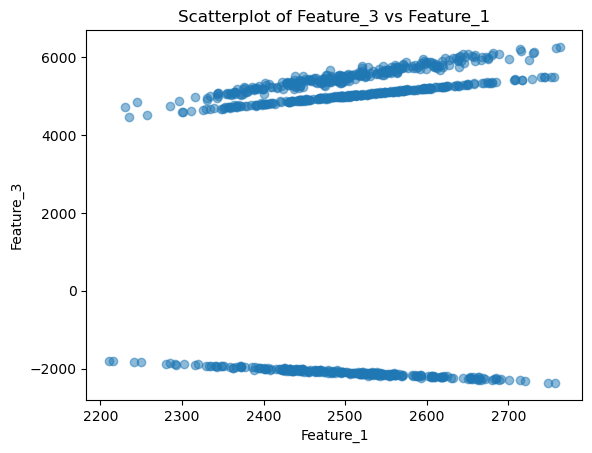

In [48]:
plt.scatter(df.Feature_1, df.Feature_3, alpha=0.5)
plt.title('Scatterplot of Feature_3 vs Feature_1')
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.show()